# NOTEBOOK 4 Analog inputs
---
This notebook contains 3 assignments

Next to digital inputs and outputs, the Feather board is equipped with analog input pins (marked green) with a 16-bits Analog to Digital converter (in short AD-converter).
![Feather board](https://cdn-learn.adafruit.com/assets/assets/000/101/973/large1024/arduino_compatibles_Feather_M4_Page.png?1619812505)

Pins number A0..A5 are so called analog pins. These pins can read Voltages (0..3.3V) against ground (GND) and convert them to a integer number between 0 - 65535 (= $2^{16} − 1$). Next to that A0 and A1 can also generate voltages (0..3.3V) with a 10 bit Digital to Analog Converter (DAC). Use of analog in function is described here [circuitpython-analog-in](https://learn.adafruit.com/circuitpython-essentials/circuitpython-analog-in).

To assign a analog port to a pin the  `analogio` library is used

In [ ]:
# copy past this into the code.py and save it
import time
import board
from analogio import AnalogIn

#define analog input pin, in this example pint A1
analogPin = AnalogIn(board.A1)

while(1):
    print(analogPin.value)
    time.sleep(0.2)
    

Use `analogPin.value` to read the 16-bits value

---
### Assignment 1

In next cell an example script is given in which a analog pin is used. (To limit the output `while True:` is replaced by `for i in range(100)`) 

A function is defined to convert the 16-bits number to a voltage. **Add to the `def get_voltage(pin)` function a formula to read the analog voltage of that pin. Use `pin.value`**
Reformat the output and create a graph of the data using the Data Graphing notebook. [Data Grahing notebook](/Data Graphing.ipynb).

In [ ]:
# copy past this into the code.py and save it
import time
import board
from analogio import AnalogIn

#define analog input pin
analogPin = AnalogIn(board.A1)


def get_voltage(pin):
     # add a formula to return the voltage of the pin. Use pin.value
    return

for i in range(100):    
    print(get_voltage(analogPin))
    time.sleep(0.1)

In [ ]:
# =============== YOUR CODE GOES HERE =================
import time
import board
from analogio import AnalogIn

#define analog input pin
analogPin = AnalogIn(board.A1)


def get_voltage(pin):
     # add a formula to return the voltage of the pin. Use pin.value
    return (pin.value * 3.3) / 65536

for i in range(100):    
    print(get_voltage(analogPin))
    time.sleep(0.1)


Paste your graph here (Right click and select `Paste Cells Below`

## PWM output
---


We mentioned the digital input and output functions and analog input and output before. Analog output can only be used by A0 and A1 pins. We can also use digital pins to mimic an analog output with a so called PWM function. PWM stand for Pulse Width Modulation and it is used for digital pins only.

A PWM signal (Pulse Width Modulation) is characterized by a pulse width and pulse frequency

![alt text](http://gadgetronicx.com/wp-content/uploads/2015/02/pwm-signal.png)

The pulse width (or duty cycle) is the percentage on of the whole cycle and the frequency is the frequency of the cycle.

The average voltage is linear with the duty cycle of the PWM signal.

The nice thing of a PWM-signal is that it is "build in" into the microprocessor so you don't have to care about the timing of the pulses. The pulse frequency ranges from 100 Hz - 10 kHz. It can be used to control LED intensitie, generate sounds, etc.

Not every digital pin of the Feather M4 board can be used as a PWM pin. In the pinout diagram above the PWM pins are marked with a -~-

To use PWM pins in `CircuitPython` you need to use the `pwmio` library. See [circuitpython-pwm](https://learn.adafruit.com/circuitpython-essentials/circuitpython-pwm) for more details.This library is part of the Build In libraries so not further action is required. 

First the library is installed and the pin is defined. See belows example.

Since we're using the onboard LED, we'll call the object `led`. Use `pwmio.PWMOut` to create the output and pass in the D13 LED pin to use. If you want to change frequency you have to assign this explicitly

In [ ]:
import time
import board
import pwmio

# LED setup D13 is the build in LED:
led = pwmio.PWMOut(board.D13, frequency=5000, duty_cycle=0, variable_frequency=True) # explicit indicate use of variable frequency.


The duty_cycle is controlled with a 16-bit number ranging from 0 (0%) to 65535 (100%)

In [ ]:
led.duty_cycle = 65535/2 # a number between 0 (0%) to 65535 (100%)
led.frequency = 1000

---
### Assignment 2

For this assignment you need a potentiometer. Use the Introduction notebook on how to wire a potentiometer. Make a script to use a potentiometer (via analog in) to make a dimmable LED (you can use D13 or an external LED)

In [ ]:
# =============== YOUR CODE GOES HERE =================
import time
import board
from analogio import AnalogIn
import pwmio
#define analog input pin
analogPin = AnalogIn(board.A0)

led = pwmio.PWMOut(board.D0, frequency=5000, duty_cycle=0, variable_frequency=True) # explicit indicate use of variable frequency.
led.frequency = 1000

def get_voltage(pin):
     # add a formula to return the voltage of the pin. Use pin.value
    return (pin.value * 3.3) / 65536

while True:
    print(get_voltage(analogPin), analogPin.value)
    time.sleep(0.1)
    led.duty_cycle = analogPin.value



## Maximum sample frequency / counter
---

In many applications sensor data is sampled at a certain frequency (= sample frequency). The higher the sensor data frequencies, the higher the sample frequency must be. The Nyquist–Shannon sampling theorem is an essential principle for digital signal processing linking the frequency range of a signal and the sample rate required to avoid a type of distortion called aliasing. The theorem states that the sample rate must be at least twice the bandwidth of the signal to avoid aliasing (ref [wikipedia Nyquist](https://en.wikipedia.org/wiki/Nyquist–Shannon_sampling_theorem)).

In this assignement you will use a PWM signal to blink a LED and use a photo diode to measure the pulse frequency. You will optimise your code to read (reliably) the highest PWM frequency as possible. 

In this assignment you will use your own creativity to find the right solution.


---
### Assignment 3

Wire a LED to a PWM-pin. Connect a photo-diode to an analog pin (long wire is the anode) with a series resistor of 1k. Use the Introduction notebook on how to wire a photo-diode. Bend the LED horizontally so that the light from the LED is measured by the photo-diode. In the next cells the steps to take are described.

Some (helpfull) tips:
- take multiple samples (> 100) of a signal to get reliable sample frequencies
- printing data to the monitor is very time consuming
- use the time library to measure times (e.g. `time.monotonic()`)

Remarks:
>numpy is not available in `CircuitPython`. If you want to use array use lists (If you want to use numpy, you can use the core module ulab instead https://learn.adafruit.com/ulab-crunch-numbers-fast-with-circuitpython/overview. Use ```from ulab import numpy as np```)



Follow these steps:
1. Build a system in which a LED is blinking with a PWM frequency and in which the photo-diode is used to measure light intensities in time
2. Make a plot of the photo-diode signal against time. Use this plot to analyse the photo diode signal. Use the Data Graphing notebook Paste your graph  (Right click and select `Paste Cells Below`)

In [ ]:
# =============== YOUR CODE GOES HERE =================
# use comments to explian your code.
import time
import board
import pwmio
from analogio import AnalogIn
from digitalio import DigitalInOut, Direction, Pull

sensor = AnalogIn(board.A3)

led = pwmio.PWMOut(board.D11, frequency = 100, duty_cycle=int(65536/2), variable_frequency=True) # explicit indicate use of variable frequency.
led.frequency = 100

current_time = time.monotonic()
while True:
    print(((sensor.value),))
    time.sleep(0.05)

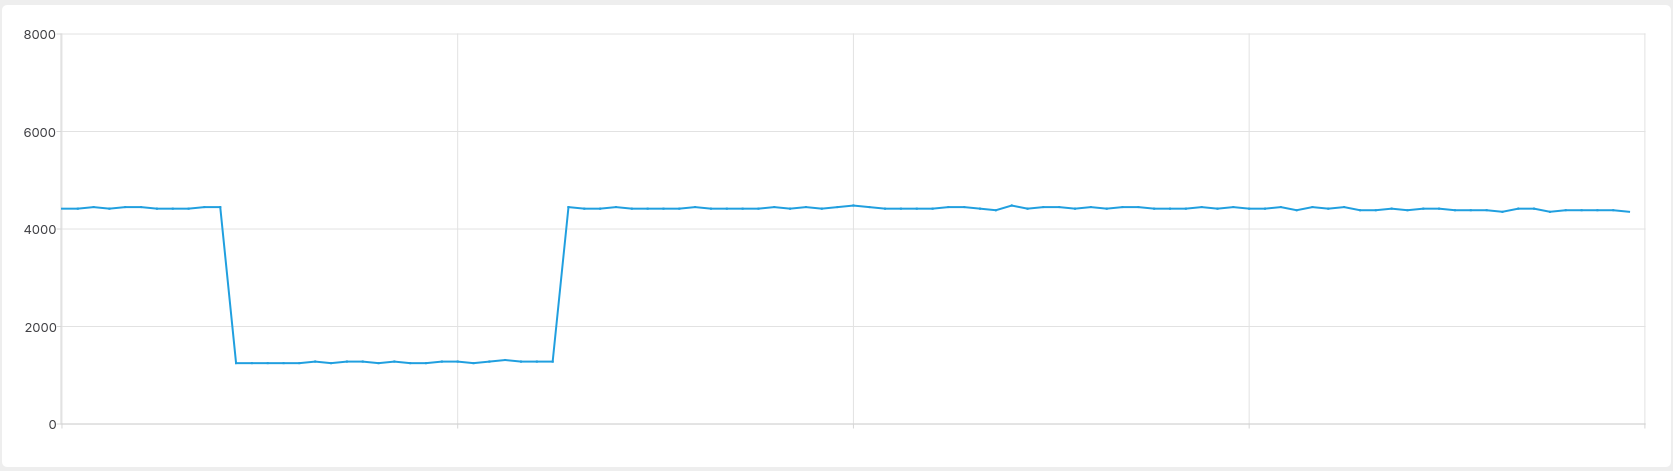

3. Build a pulse counting function to determine PWM frequency from the photo-diode measurements. Report the measured pulse frequency and compare this with the PWM frequency to check your pulse counting function. Keep PWM frequency low.

In [ ]:
# =============== YOUR CODE GOES HERE =================
# use comments to explian your code. 
# pulse counting function

import time
import board
import pwmio
from analogio import AnalogIn
from digitalio import DigitalInOut, Direction, Pull

sensor = AnalogIn(board.A3)

led = pwmio.PWMOut(board.D11, frequency = 300, duty_cycle=int(65536/2), variable_frequency=True) # explicit indicate use of variable frequency.


# Function to count rising edges within a time interval
def count_edges(interval):
    start_time = time.monotonic()
    count = 0
    while (time.monotonic() - start_time) < interval:
        if sensor.value > 2000:  # Adjust threshold as needed
            count += 1
            while sensor.value > 2000:  # Wait for signal to drop
                time.sleep(0.05)
                pass
        time.sleep(0.05)
    return count

# Main loop
while True:
    # Print voltage and value of sensor
    # print("Voltage:", get_voltage(sensor), "Value:", sensor.value)
    
    # Measure pulse frequency
    interval = 1  # Time interval in seconds
    pulse_count = count_edges(interval)
    pulse_frequency = pulse_count / interval
    
    print("Pulse Frequency:", pulse_frequency, "Hz")
    
    time.sleep(0.1)  # Adjust sleep time as needed

In [ ]:
# =============== YOUR OUTPUT GOES HERE ================
Pulse Frequency: 300.0 Hz
Pulse Frequency: 300.0 Hz
Pulse Frequency: 300.0 Hz

4. Optimize your code to get the highest sample frequency as possible. Be creative to find the best solution.
5. Make a plot of the measured frequency against PWM frequency. Use the Data Graphing notebook. Paste your graph  (Right click and select `Paste Cells Below` 

In [ ]:
# =============== YOUR CODE GOES HERE =================
# use comments to explian your code. 
import time
import board
import pwmio
from analogio import AnalogIn
from digitalio import DigitalInOut, Direction, Pull

sensor = AnalogIn(board.A3)

led = pwmio.PWMOut(board.D11, frequency = 150, duty_cycle=int(65536/2), variable_frequency=True) # explicit indicate use of variable frequency.


# Function to count rising edges within a time interval
def count_edges(interval):
    start_time = time.monotonic()
    count = 0
    while (time.monotonic() - start_time) < interval:
        if sensor.value > 2000:  # Adjust threshold as needed
            count += 1
            while sensor.value > 2000:  # Wait for signal to drop
                time.sleep(1/(150*2)) #time.sleep is used to demonstrate sampling frequency
                pass
        time.sleep(1/(150*2))
    return count

# Main loop
while True:
    # Print voltage and value of sensor
    # print("Voltage:", get_voltage(sensor), "Value:", sensor.value)
    
    # Measure pulse frequency
    interval = 1  # Time interval in seconds
    pulse_count = count_edges(interval) #count the number of upward edges
    pulse_frequency = pulse_count / interval
    
    print("Pulse Frequency:", pulse_frequency, "Hz")
    
    time.sleep(0.1)  # Adjust sleep time as needed

# Answer the following question: 

- What is your maximum sample frequency?
the maximum sample frequency is high enough to measure the highest pwm frequency allowed by the pwm module, which is 10 kHz.
- What is the maximum PWM frequency your can measure reliably?
10 kHz
- Is this according to Nyquist–Shannon sampling theorem? Explain!
When an artificial sampling frequency is added using a sleep function to simulate a certain sampling frequency, it can be found that when the sampling frequency is less than two times the frequency that is measured, the results get unreliable. This is in accordance with the Nyquist-Nyquist–Shannon theorem.
    